In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from matplotlib.ticker import FuncFormatter


In [ ]:
#we are loading here all the predictions to compate them and calculate the errors

In [2]:
#load the predictions and sales per store(calculated in forecast_stores)
pred_store = pd.read_csv('only_prediction_stores.csv', sep=',', index_col=0)
sales_store = pd.read_csv('only_sales_stores.csv', sep=',', index_col=0)



In [3]:
#load the total predictions (calculated in forecast_all)
pred_all_scaled_1 = pd.read_csv('prediction_all.csv', sep=',', index_col=0)
pred_all_scaled = pred_all_scaled_1[pred_all_scaled_1['Store'].between(1, 45)].groupby(['Store', 'Date'])['Prediction'].sum() \
                                    .unstack(level='Store') \
                                    .rename_axis(columns=None).add_prefix('Store')

pred_all_scaled

,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,...,Store36,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-08,1.728586e+06,1.965801e+06,529530.420188,2.098018e+06,496235.327846,1.485033e+06,710539.134103,1.025702e+06,612196.367799,1.711212e+06,...,472383.676373,630189.883180,585289.754255,1.497391e+06,1.097020e+06,1.622590e+06,618642.656792,545974.634781,638650.019981,9.962867e+05
2012-06-15,1.657975e+06,1.928423e+06,528883.928045,2.093324e+06,487620.391593,1.458358e+06,702202.083160,1.018987e+06,611115.845093,1.623752e+06,...,454419.464563,638487.112884,581719.296106,1.497736e+06,1.102707e+06,1.594105e+06,618610.635831,546880.709908,625771.485988,1.045762e+06
2012-06-22,1.651928e+06,1.919080e+06,531701.575526,2.053875e+06,483836.074535,1.436564e+06,706170.067426,1.045159e+06,642164.091120,1.573975e+06,...,462610.112598,635846.919904,593918.377286,1.477131e+06,1.078008e+06,1.567288e+06,627159.924220,565764.117913,641291.624994,1.022306e+06
2012-06-29,1.734350e+06,2.037148e+06,528447.307137,2.122787e+06,493807.214811,1.536529e+06,733259.624232,1.091061e+06,643706.442571,1.666487e+06,...,492964.608630,642178.852973,591878.313280,1.621189e+06,1.195576e+06,1.659972e+06,618827.121078,557134.909585,640183.610724,1.072971e+06
2012-07-06,1.624983e+06,1.984408e+06,546881.226805,1.969265e+06,498713.715075,1.449807e+06,687546.670851,1.081692e+06,628423.547554,1.622375e+06,...,495253.332361,656789.491719,606670.167785,1.580422e+06,1.088778e+06,1.582427e+06,628100.085653,558750.752255,665095.930815,1.000532e+06
2012-07-13,1.764428e+06,2.040333e+06,541769.435815,2.027096e+06,505212.920150,1.501914e+06,712965.822586,1.115041e+06,667405.201189,1.663956e+06,...,509762.080404,679377.739675,609396.094788,1.627161e+06,1.150531e+06,1.659225e+06,642360.047843,571911.089735,649123.786677,1.086528e+06
2012-07-20,1.764670e+06,2.028378e+06,552142.613566,1.999926e+06,511998.648935,1.516422e+06,757352.254332,1.116794e+06,665097.761640,1.641710e+06,...,496229.110792,686800.970958,605471.909434,1.668693e+06,1.162052e+06,1.658257e+06,663585.154075,572295.341266,661251.902454,1.103350e+06
2012-07-27,1.777930e+06,2.065020e+06,542719.350896,2.012783e+06,501381.413105,1.526454e+06,799694.195966,1.146545e+06,677874.500252,1.621262e+06,...,497625.532726,677373.690390,579982.909729,1.643981e+06,1.146924e+06,1.680297e+06,624273.264856,593146.048353,661292.494931,1.114031e+06
2012-08-03,1.770965e+06,2.040229e+06,546501.097196,2.040633e+06,506156.802615,1.538878e+06,801799.771872,1.185138e+06,682880.041148,1.682556e+06,...,495825.976355,667757.166317,594894.544670,1.619681e+06,1.112158e+06,1.696788e+06,622864.794511,581083.526962,698464.529495,1.121376e+06


In [4]:
#load the predictions per store(calculated in forecast_stores_2)
only_pred_store_2 = pd.read_csv('prediction_stores_2.csv', sep=',', index_col=0)
pred_store_2 = only_pred_store_2[only_pred_store_2['Store'].between(1, 45)].groupby(['Store', 'Date'])['Prediction'].sum() \
                                    .unstack(level='Store') \
                                    .rename_axis(columns=None).add_prefix('Store')

pred_store_2

,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,...,Store36,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-08,1.427451e+06,2.012955e+06,190166.899247,2.213153e+06,389277.017336,1.534891e+06,522567.267875,1.008399e+06,491513.142818,1.721405e+06,...,318866.800960,729492.325182,515447.193589,1.943526e+06,1.035540e+06,2.024614e+06,698693.679974,845805.606591,396334.485258,754307.041978
2012-06-15,1.488914e+06,2.033322e+06,197700.872562,2.120487e+06,374595.484052,1.562447e+06,519712.670681,1.047959e+06,495980.829566,1.700717e+06,...,318733.151622,768059.818564,507426.888114,1.878627e+06,1.073183e+06,1.982561e+06,704194.780542,901472.908692,384694.865725,776785.703376
2012-06-22,1.519820e+06,2.171325e+06,193374.881185,2.072953e+06,360083.635465,1.682183e+06,527209.819761,1.017860e+06,524996.953279,1.682460e+06,...,342978.576541,734406.737965,493347.286991,1.893155e+06,1.156812e+06,2.030184e+06,748316.788488,845452.820963,407140.072676,808997.678366
2012-06-29,1.436607e+06,2.218667e+06,194484.971853,2.024349e+06,371864.795468,1.580039e+06,533859.047920,9.309350e+05,507369.660548,1.726817e+06,...,354035.037029,720064.790657,487164.682484,1.929030e+06,1.081226e+06,1.856806e+06,737504.779418,837803.834244,400397.720292,781983.256912
2012-07-06,1.438519e+06,2.531697e+06,198007.437003,2.057264e+06,364930.314068,1.586090e+06,530922.880068,9.519293e+05,497296.990401,1.712574e+06,...,358642.495851,731158.259204,487417.053405,2.356693e+06,1.146209e+06,2.005812e+06,745439.222708,833634.196249,413331.587425,761541.208464
2012-07-13,1.524061e+06,2.110204e+06,196292.671944,2.057434e+06,363198.263677,1.652688e+06,526596.154593,1.011228e+06,507667.622265,1.695855e+06,...,393905.081752,741620.893143,499474.343643,3.125697e+06,1.129955e+06,2.016530e+06,766573.893798,841483.039613,409133.476880,751764.487266
2012-07-20,1.541893e+06,2.151791e+06,200283.104513,2.047219e+06,371493.456475,1.664524e+06,537515.555163,1.034539e+06,500269.178258,1.683738e+06,...,368817.973323,761190.122452,512185.211308,3.549261e+06,1.154226e+06,2.053420e+06,788910.357264,854655.789502,412842.112947,774041.509889
2012-07-27,1.532306e+06,2.158313e+06,199648.255658,2.022778e+06,364439.256002,1.637315e+06,544448.851265,9.978863e+05,512993.478093,1.685520e+06,...,366092.930518,755912.487824,500754.352243,3.235941e+06,1.141301e+06,2.046938e+06,755586.237548,859011.155915,415528.669746,769139.009236
2012-08-03,1.534841e+06,2.109804e+06,203703.606544,2.083626e+06,372736.570874,1.640437e+06,529677.113725,1.178553e+06,507204.664783,1.692220e+06,...,360181.559517,761950.574112,521345.547462,2.368690e+06,1.101972e+06,2.067055e+06,776715.403124,863961.657369,429634.242726,780582.821797


In [5]:
#load the total predictions (calculated in forecast_all_uscaled)
pred_all_unscaled_1 = pd.read_csv('unscaled_val_pred.csv', sep=',', index_col=0)
pred_all_unscaled = pred_all_unscaled_1[pred_all_unscaled_1['Store'].between(1, 45)].groupby(['Store', 'Date'])['Prediction'].sum() \
                                    .unstack(level='Store') \
                                    .rename_axis(columns=None).add_prefix('Store')

pred_all_unscaled

,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,...,Store36,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-08,467990.6687,604472.8685,151082.2703,627533.6287,147740.8280,598388.8955,249001.1151,457187.9702,345099.2321,389252.4054,...,111131.0280,122979.6218,129616.2464,539640.8026,487574.6050,601760.1540,131168.8066,115765.7830,129433.1554,349910.4953
2012-06-15,462991.2201,596475.0945,153960.4395,628511.4960,146349.3231,601337.0996,251893.6086,455257.6757,352261.9538,397008.1811,...,104089.6685,126390.7109,126983.2445,538046.6059,476485.8648,592756.1643,130240.7863,116004.5895,122287.6728,359716.9339
2012-06-22,459360.3641,605332.2123,149707.9052,626658.3460,140998.5808,601125.5990,250338.2638,464004.7837,361354.7065,388411.1796,...,104080.2116,125820.7652,129448.8200,550865.9647,463218.8943,602373.2806,129984.0425,118073.6492,127093.8254,360935.3060
2012-06-29,449718.7386,616389.0295,150451.4899,619129.1800,146540.6822,604207.6017,255335.8268,451046.6504,351168.8226,402867.5936,...,109148.1235,126538.6223,127159.1219,548959.6246,471909.4467,583043.2565,125848.6352,113193.6594,124722.6714,355936.4475
2012-07-06,456399.6689,627150.7285,153585.8023,627924.0587,146038.6106,604751.9770,251228.9583,471910.3413,346553.6412,403540.5492,...,108702.1749,125916.9159,129280.9304,576201.8123,472939.7192,602228.6644,125587.5084,110994.3107,129565.2037,346161.6774
2012-07-13,459911.0345,605207.7916,151853.6191,622759.9300,144666.1530,600261.5540,245052.3562,463412.8726,355608.8618,399413.5702,...,111279.5821,130786.3887,129244.7240,600230.2340,468583.5944,597771.2811,132822.9542,115770.0751,124426.0392,349847.1407
2012-07-20,466973.8005,623775.2215,153692.5570,613464.1886,147625.4771,608850.1970,276858.6315,461320.2474,349936.6598,394263.5902,...,106327.4067,128111.1561,126620.3417,598623.0715,477059.6729,598681.5025,136164.8170,115382.1488,124545.8469,352798.0132
2012-07-27,466094.3176,633526.6289,153681.0055,598826.3475,146660.3715,612195.3587,283260.9629,481585.0481,357297.8284,397935.6168,...,106255.9158,126273.1834,122268.5607,599874.6777,468607.9721,580064.6206,127930.9180,120668.8713,123957.0823,355544.6998
2012-08-03,461857.7530,626156.3397,155083.3705,627414.8997,147917.6518,604113.4336,285870.4047,490042.0860,357324.4403,394673.3243,...,104053.0067,128390.8296,131365.0478,602320.0835,472312.3898,605576.9716,129479.9572,117364.6471,134149.9895,367418.4215


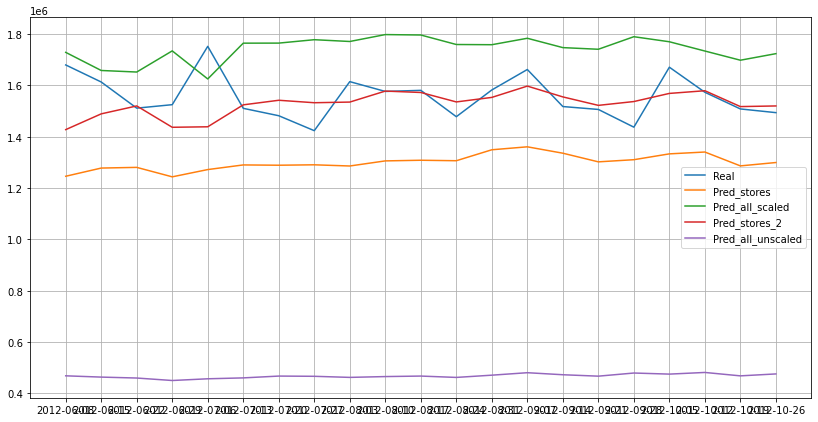

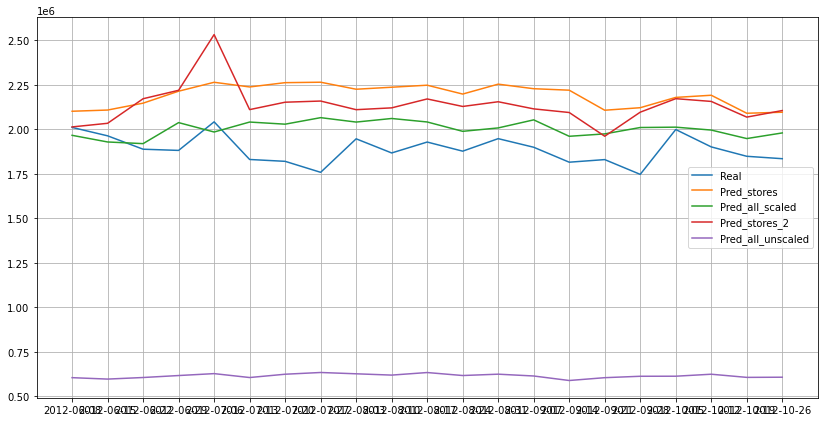

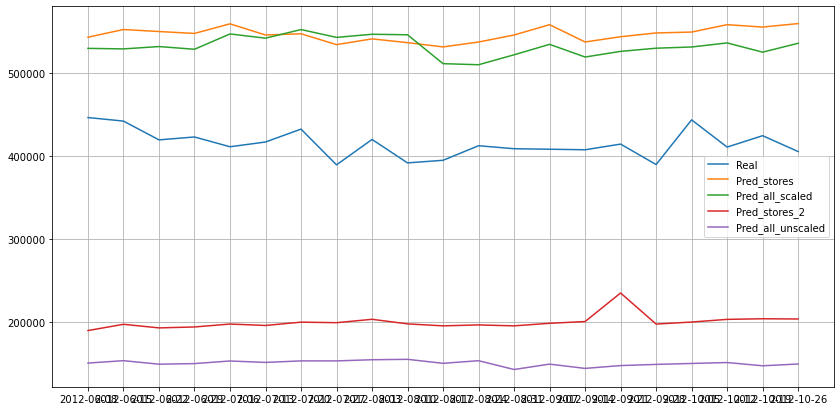

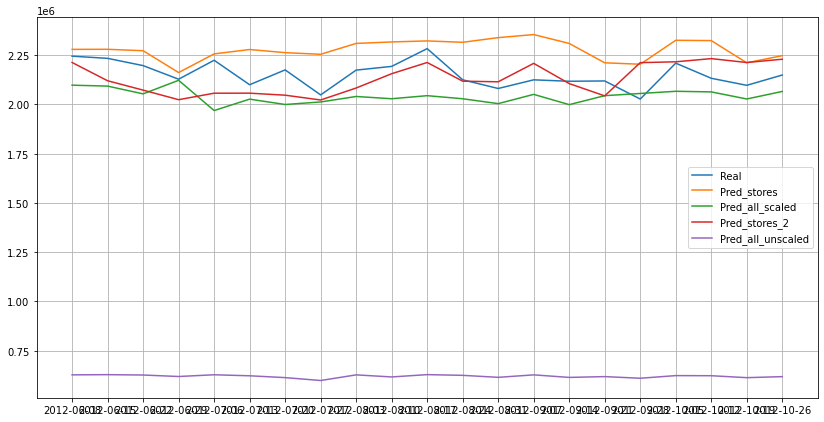

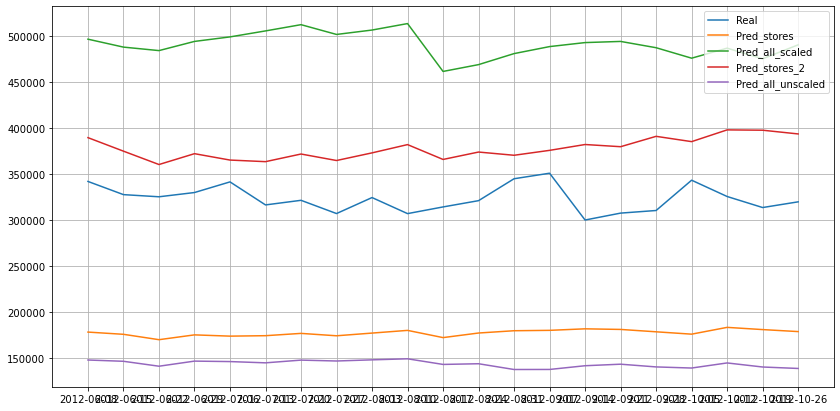

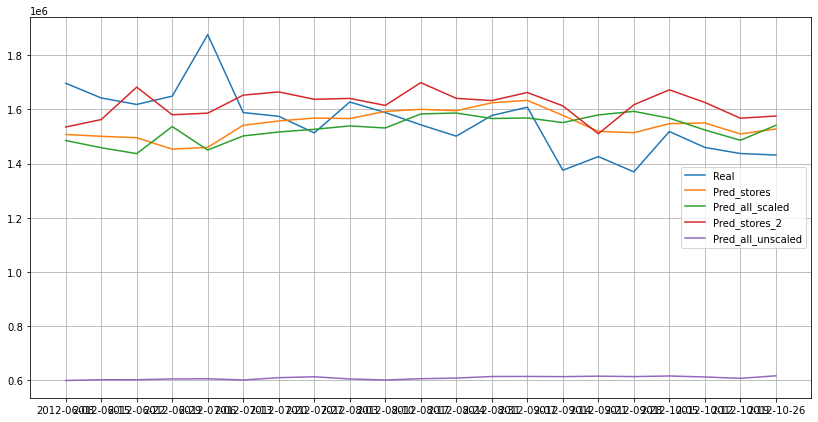

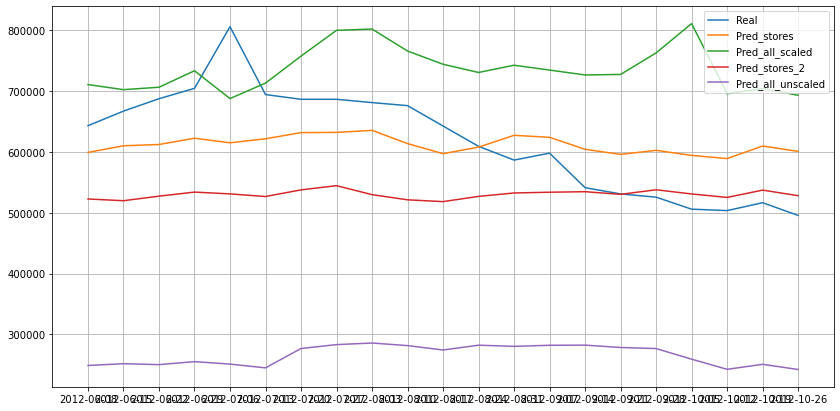

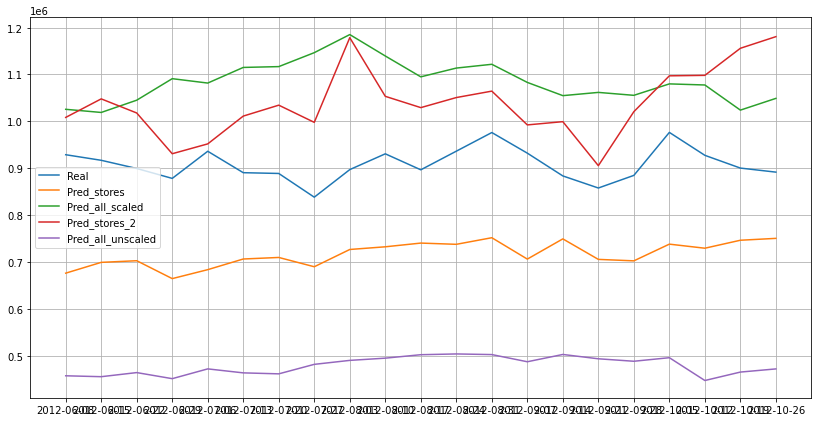

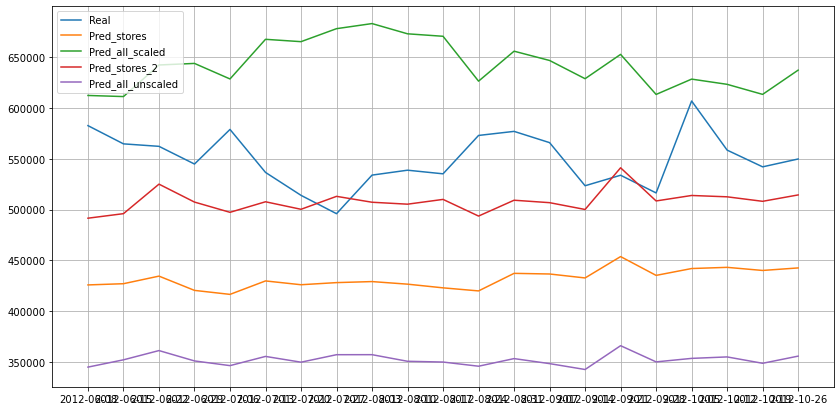

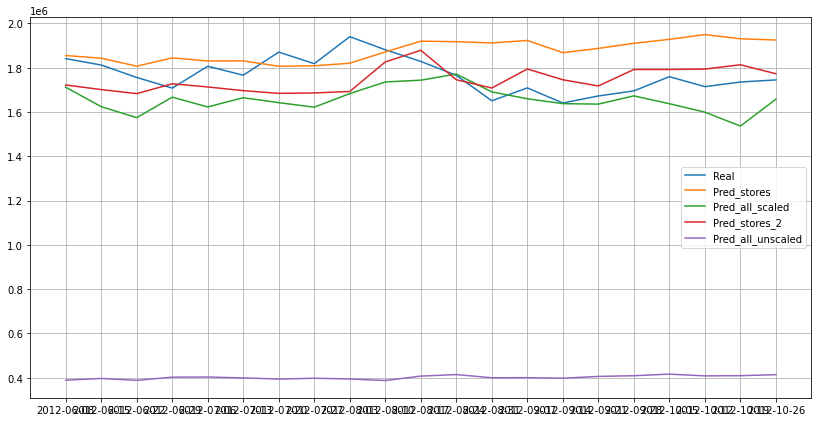

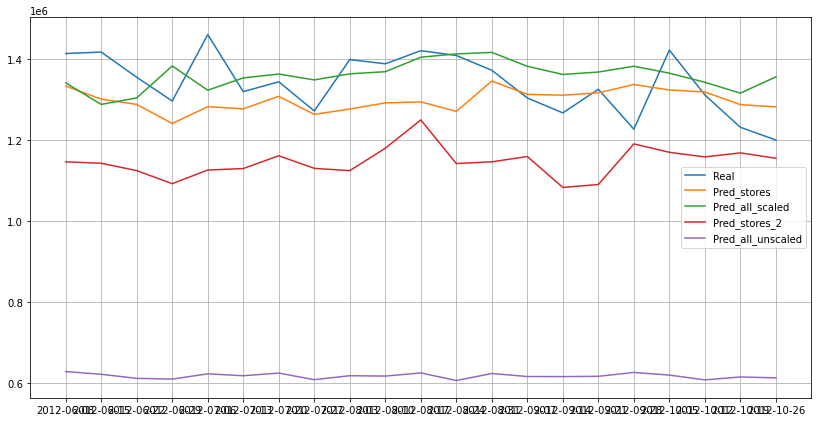

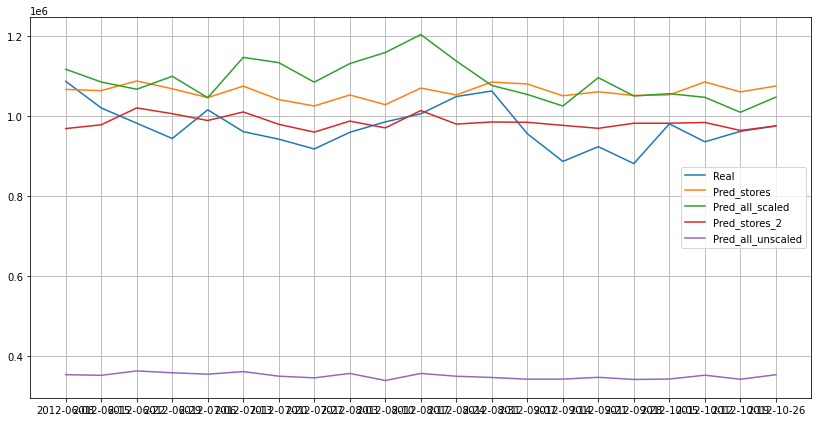

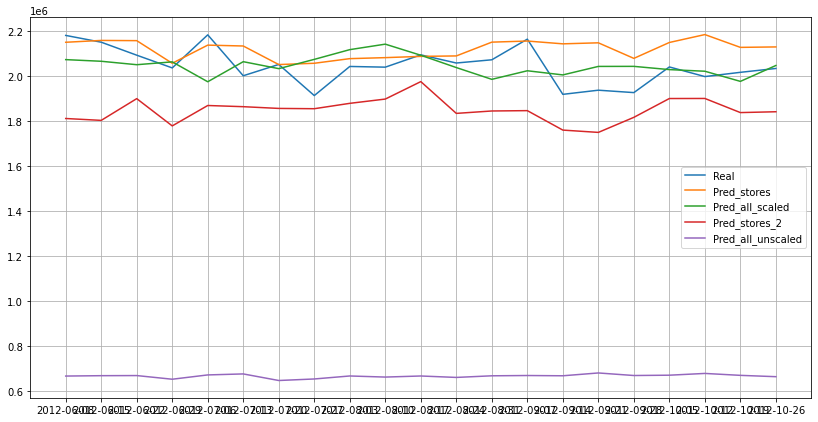

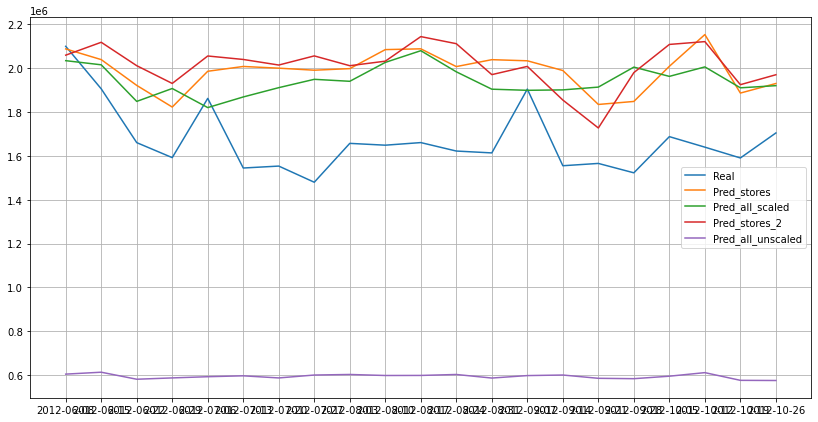

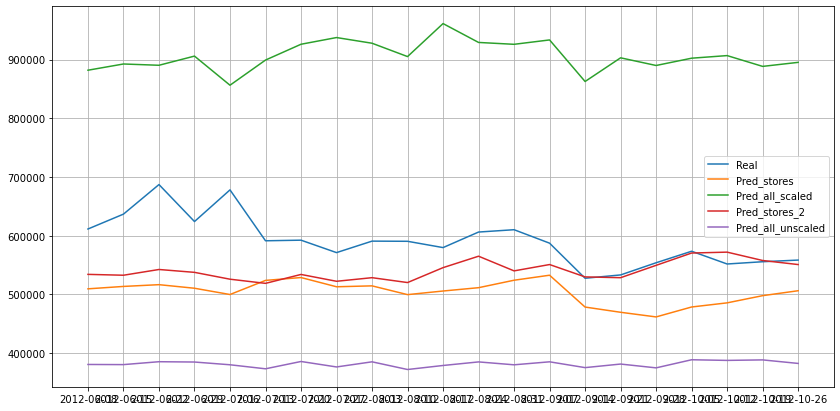

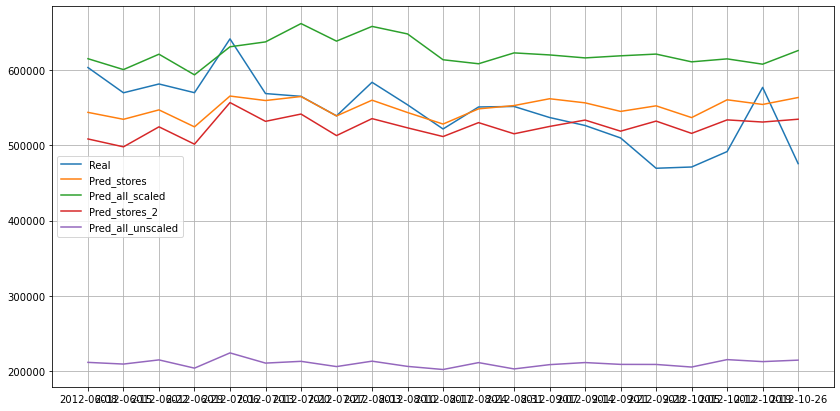

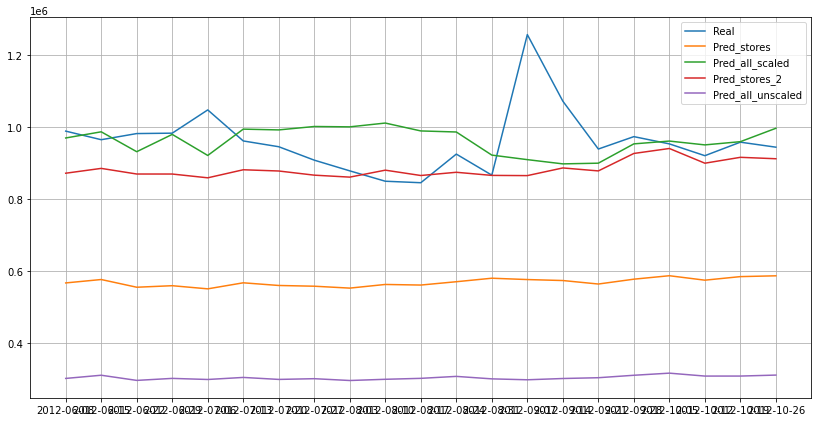

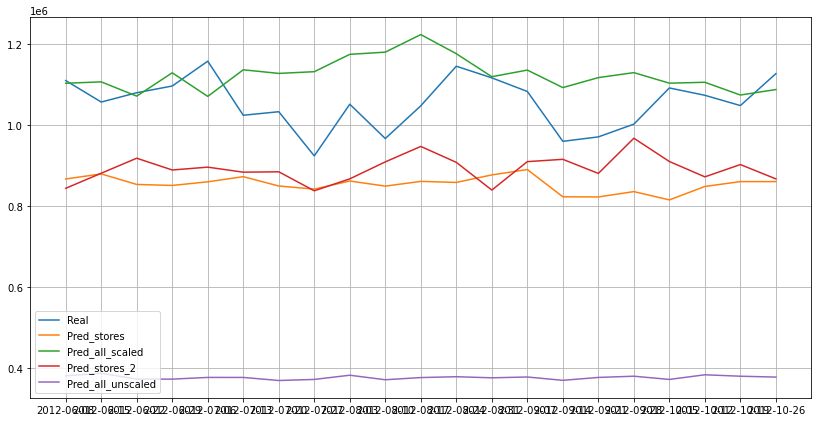

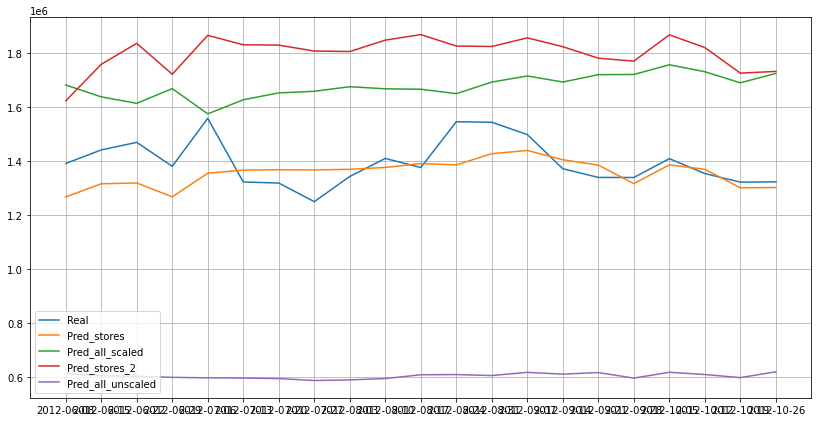

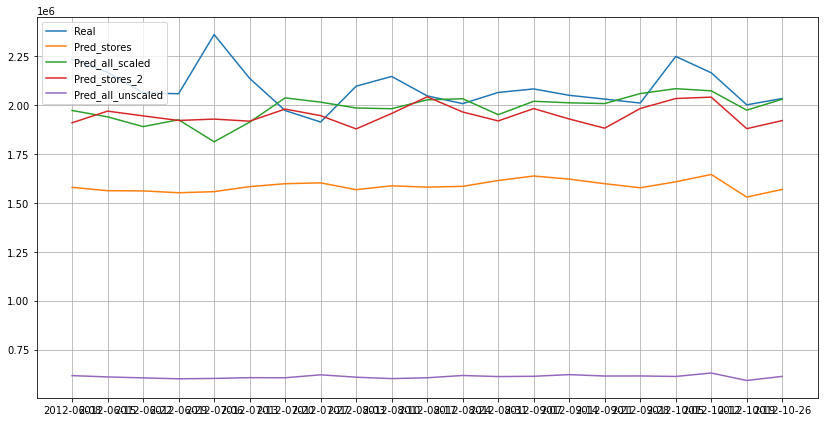

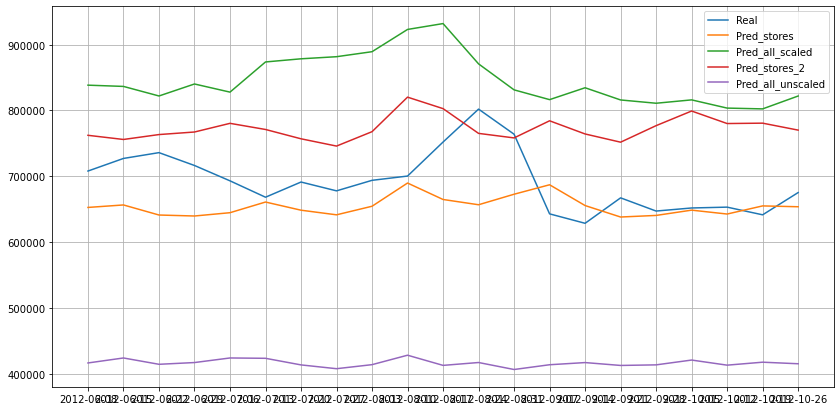

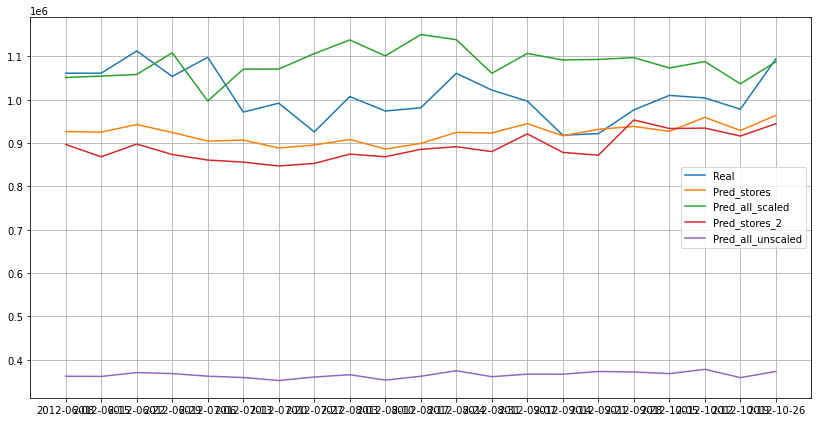

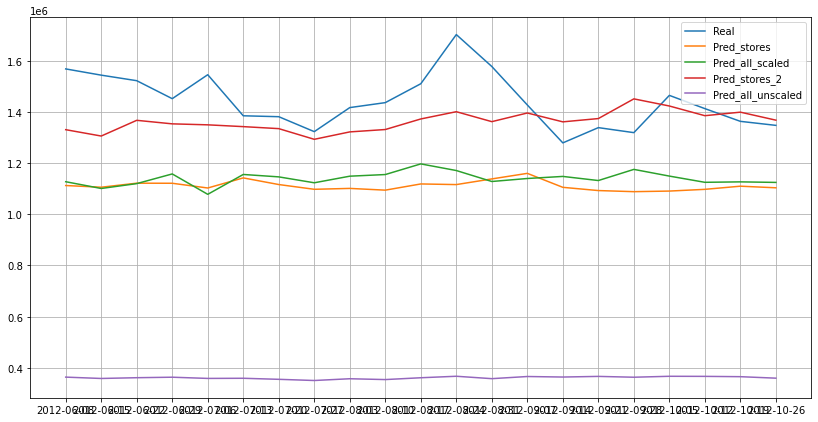

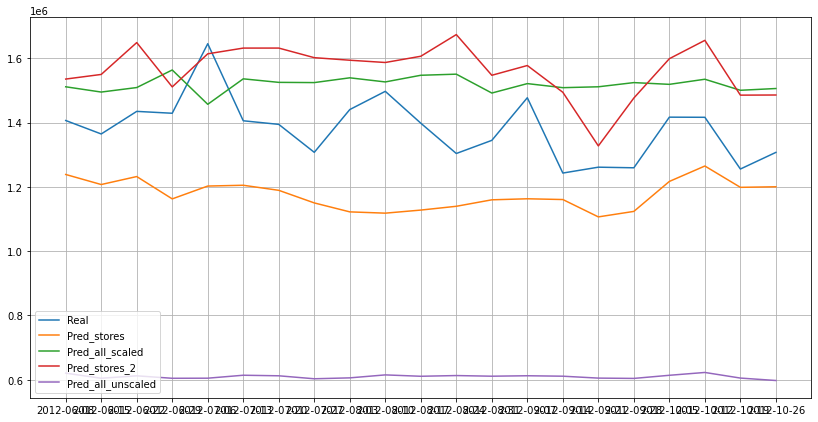

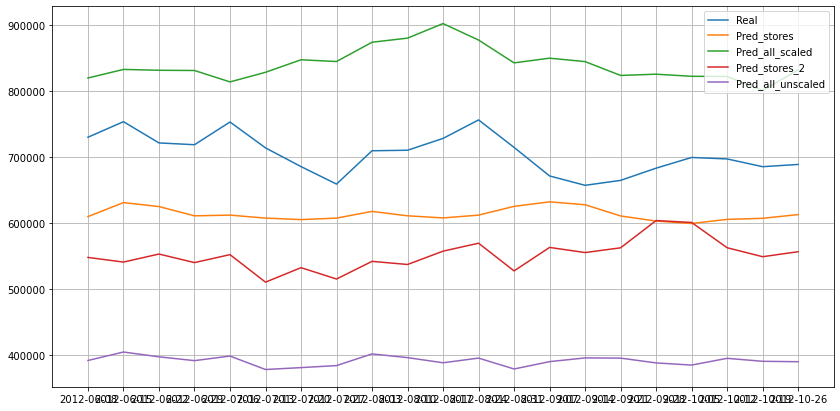

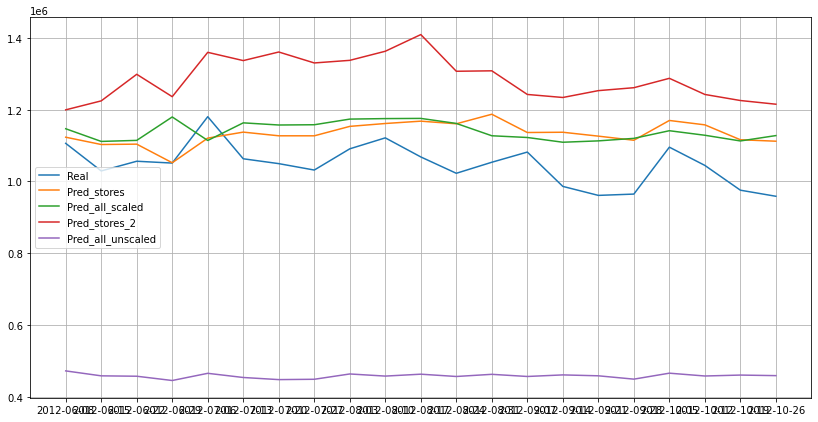

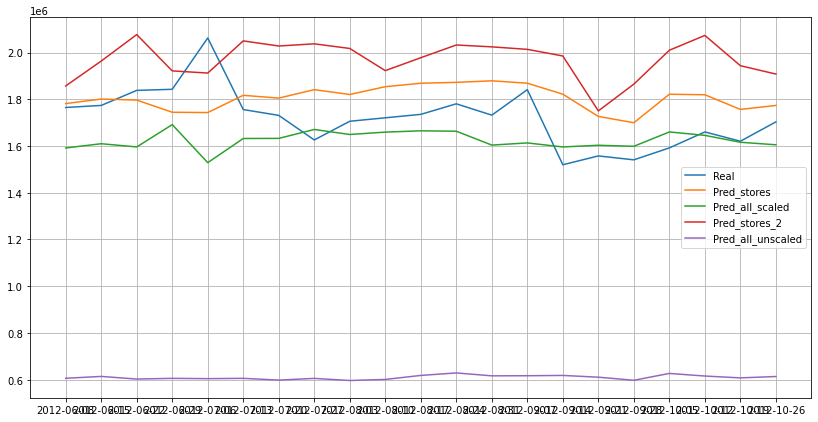

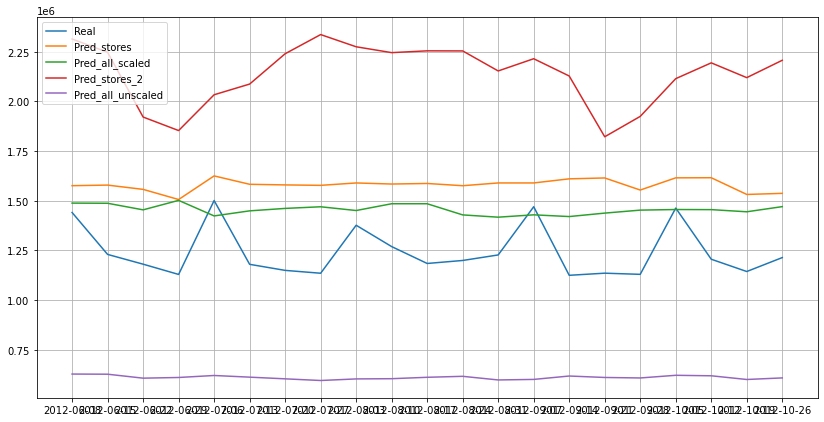

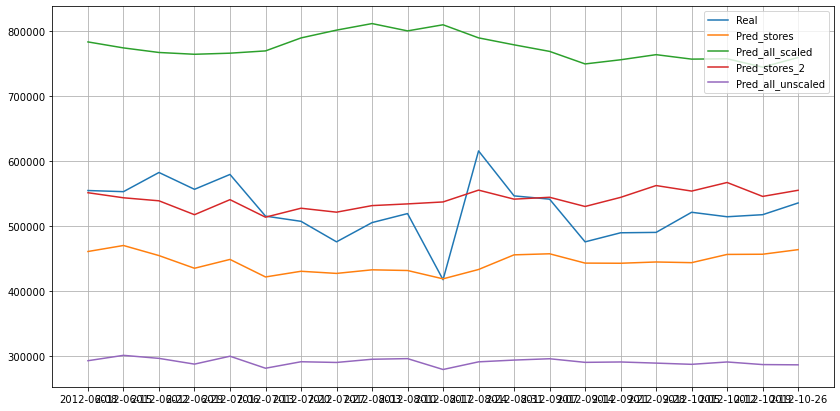

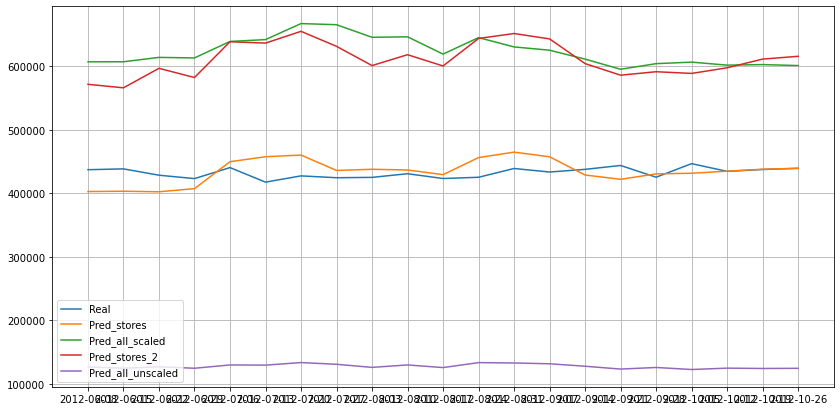

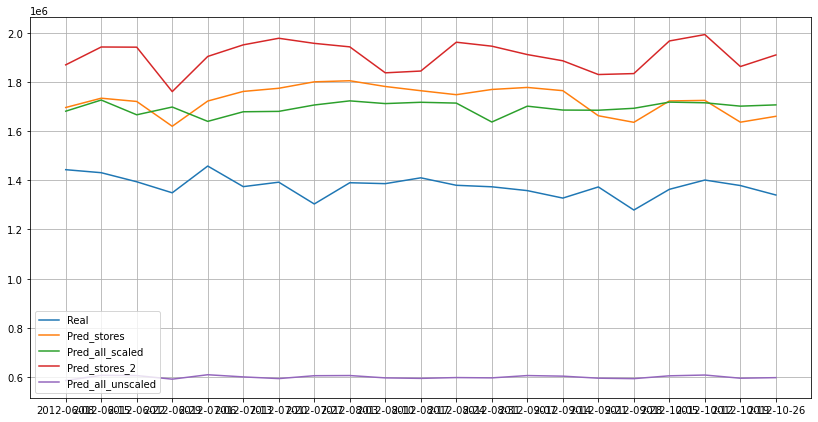

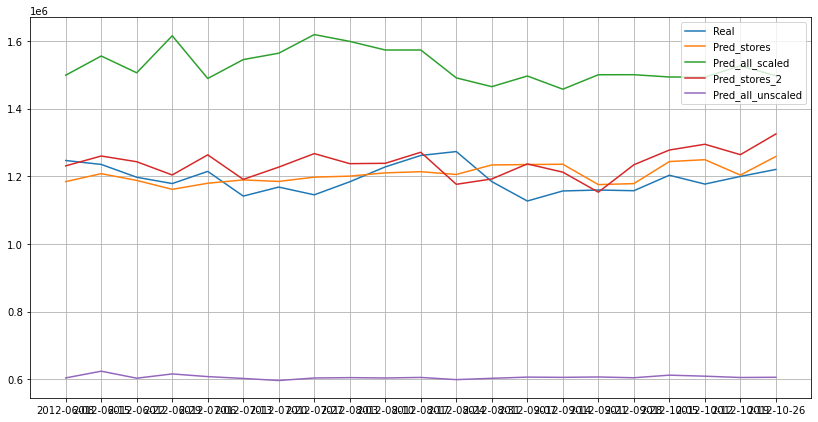

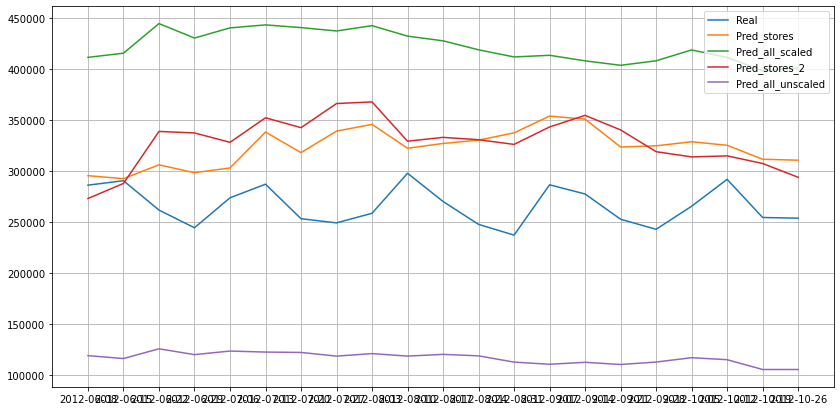

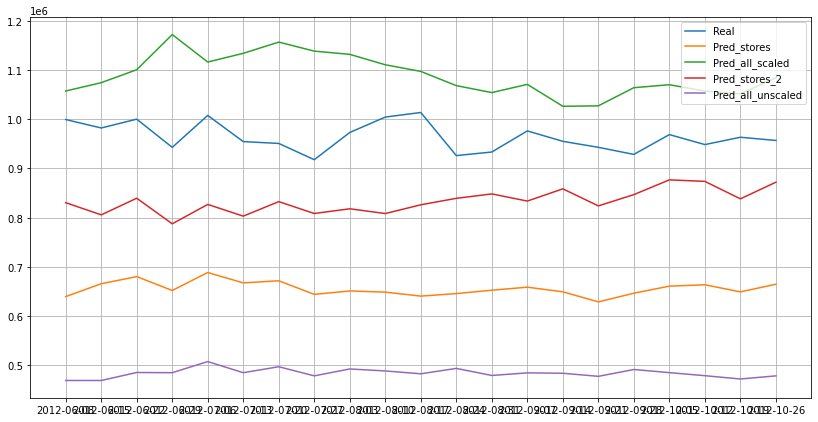

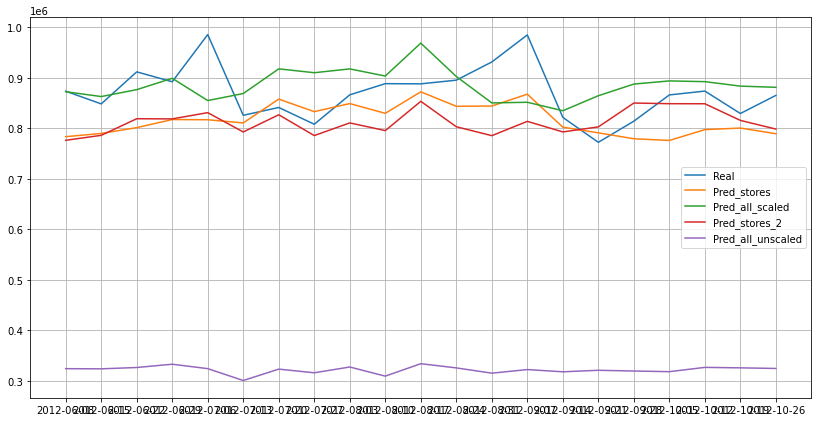

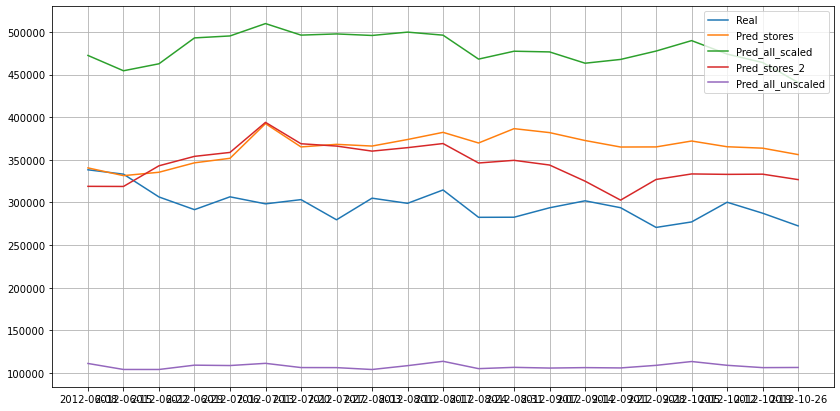

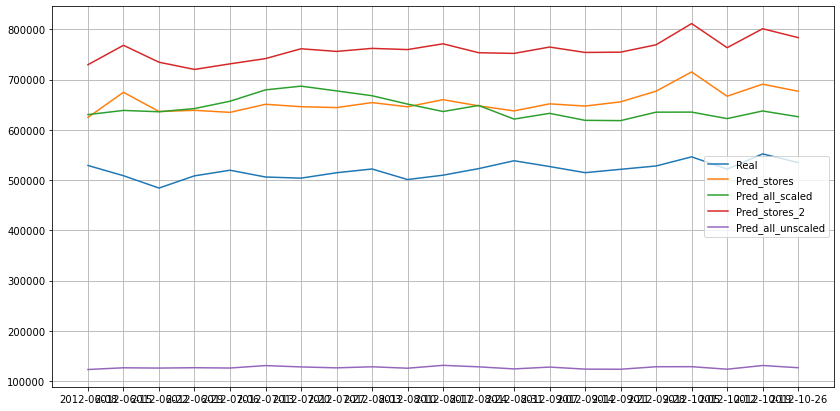

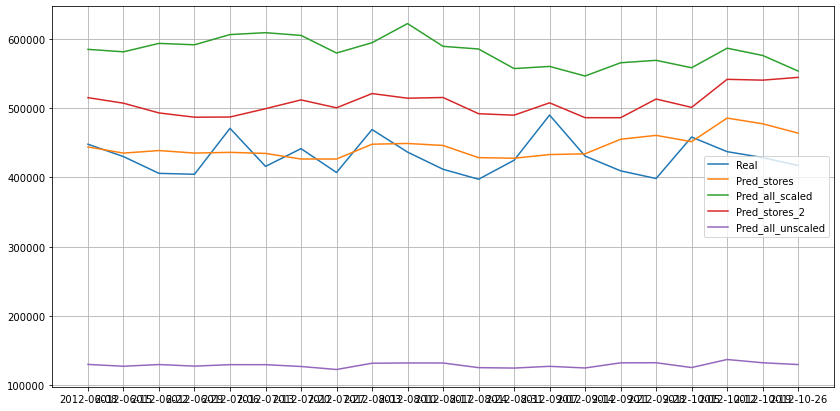

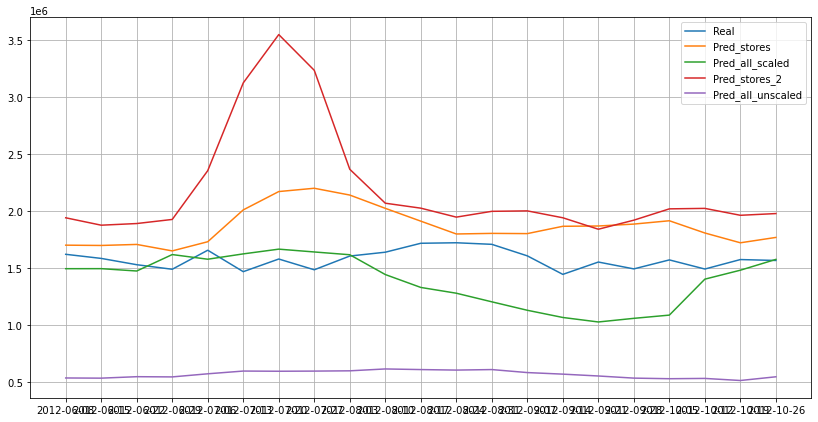

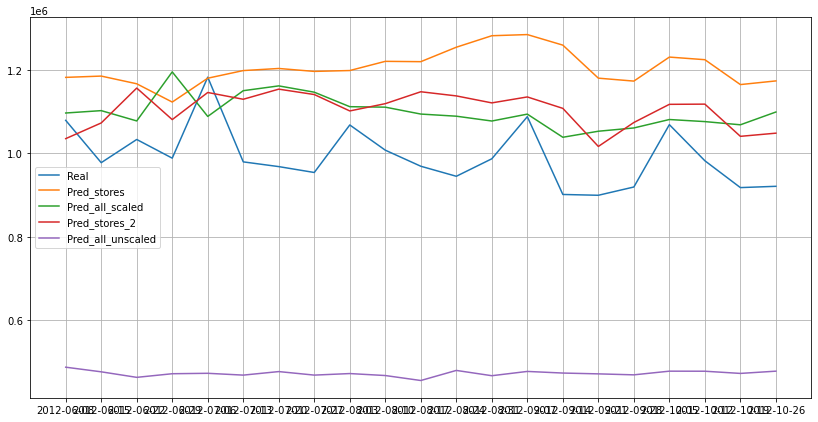

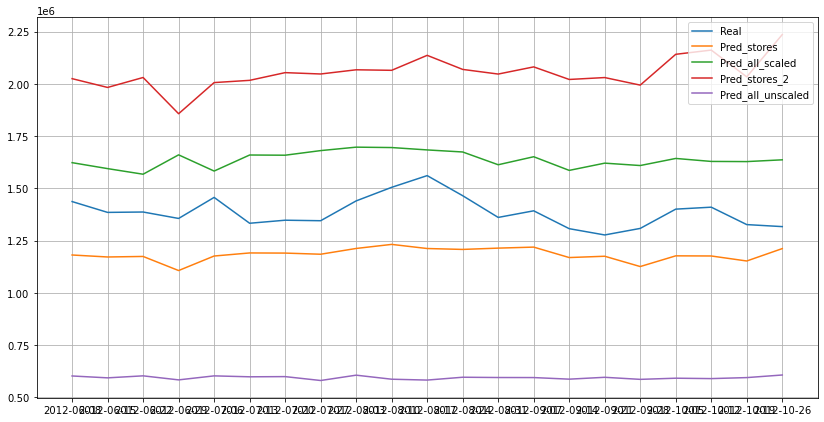

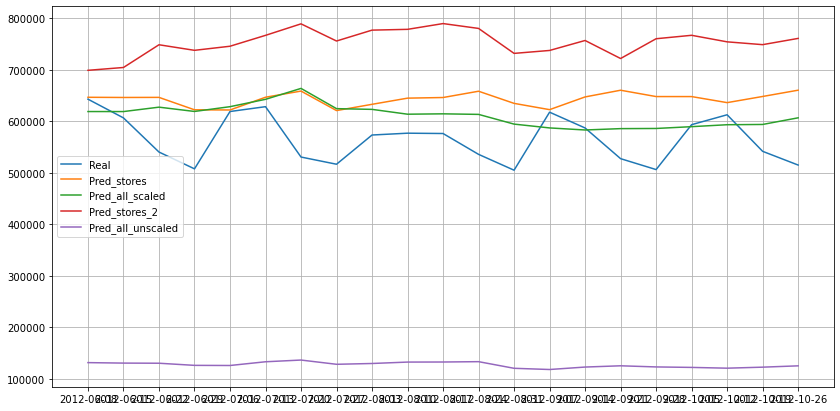

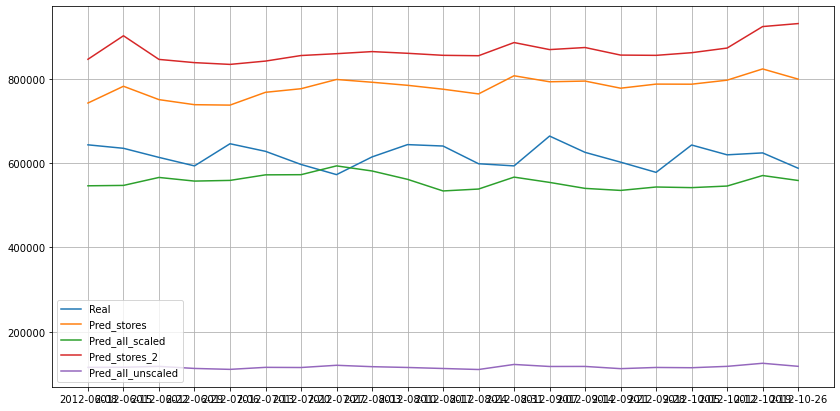

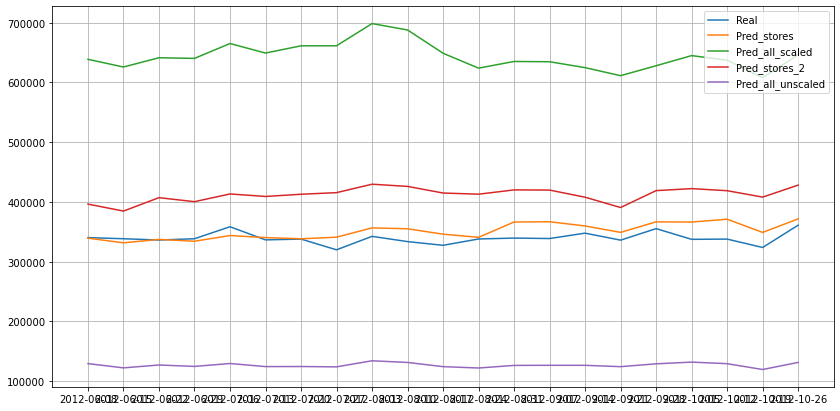

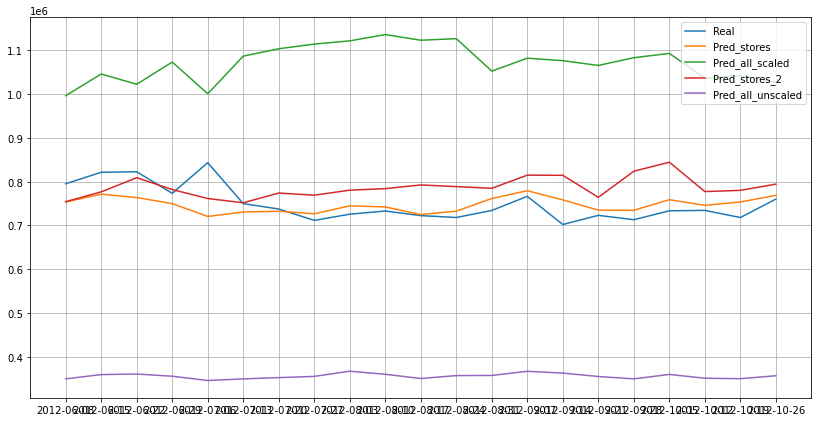

In [6]:
#compare all the predictions for each store

for date in pred_store.columns:
    plt.figure(figsize=(14,7))
    plt.grid(True)
    plt.plot(sales_store[date])
    plt.plot(pred_store[date])
    plt.plot(pred_all_scaled[date])
    plt.plot(pred_store_2[date])
    plt.plot(pred_all_unscaled[date])
    plt.legend(['Real','Pred_stores','Pred_all_scaled','Pred_stores_2','Pred_all_unscaled'])
    #plt.legend()
    plt.show()

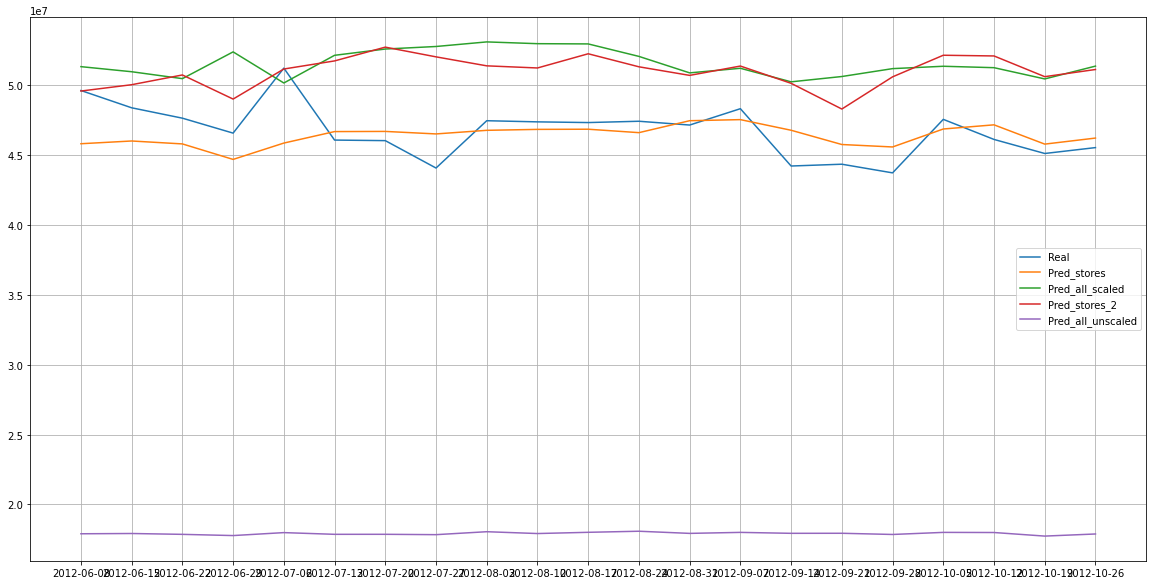

In [8]:
sum_real=sales_store.sum(axis=1)
sum_stores=pred_store.sum(axis=1)
sum_scales=pred_all_scaled.sum(axis=1)
sum_2=pred_store_2.sum(axis=1)
sum_unscaled=pred_all_unscaled.sum(axis=1)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(sum_real)
plt.plot(sum_stores)
plt.plot(sum_scales)
plt.plot(sum_2)
plt.plot(sum_unscaled)
plt.legend(['Real','Pred_stores','Pred_all_scaled','Pred_stores_2','Pred_all_unscaled'])
#plt.legend()
plt.show()

In [9]:
#load the original data for a plot
train_set=pd.read_csv('train_set.csv')
val_set=pd.read_csv('val_set.csv')

In [10]:
#load the MSEW predictions for comparison and errors
MSEW=pd.read_csv('MSEW.csv', index_col=0)
MSEW

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.557909e+06,1.906367e+06,418601.041638,2.142600e+06,347960.737914,1.616975e+06,616509.926058,894590.703442,563080.462659,1.796884e+06,...,320073.350337,531183.695540,427189.459523,1.565636e+06,1.006595e+06,1.363102e+06,607669.743510,629495.154955,336191.022739,787299.125672
1,1.567360e+06,1.943716e+06,416465.723885,2.172709e+06,344661.155372,1.587024e+06,612055.675551,904974.511078,567861.042773,1.819684e+06,...,334108.959750,536404.960948,407701.768828,1.576005e+06,9.871559e+05,1.353913e+06,578633.145548,647613.957502,330358.432965,791827.207810
2,1.531805e+06,1.854149e+06,410563.195544,2.119601e+06,342073.687051,1.548171e+06,629613.936644,883744.335905,566900.118123,1.787826e+06,...,320848.679542,531335.339289,404459.368074,1.536601e+06,9.953443e+05,1.347491e+06,525432.233517,609983.069926,332409.281479,763776.859493
3,1.564065e+06,1.890791e+06,412959.265688,2.096784e+06,354527.179337,1.614775e+06,661768.927354,899050.891715,559178.148578,1.831925e+06,...,306502.201369,533628.554032,416895.680951,1.557648e+06,1.041037e+06,1.344924e+06,505346.354891,596199.879781,332340.165894,780072.377278
4,1.594209e+06,1.923364e+06,424161.762765,2.147745e+06,348020.957651,1.631358e+06,686639.627475,897745.721832,551129.102559,1.821620e+06,...,314572.476865,528092.568278,435320.098305,1.554880e+06,1.059246e+06,1.371453e+06,580395.905788,623946.373412,333331.397992,773943.011993
5,1.567550e+06,1.897869e+06,413618.505670,2.155379e+06,335330.831534,1.547416e+06,631025.993297,892762.703089,549547.334705,1.847652e+06,...,332792.521100,528764.143299,416584.591284,1.562933e+06,9.865707e+05,1.344782e+06,602148.760305,639681.686961,328265.205186,762022.576223
6,1.536843e+06,1.848733e+06,411856.837557,2.140065e+06,338437.211344,1.541920e+06,654661.726458,877888.103724,538534.738600,1.844364e+06,...,328820.226427,530603.942394,403135.268210,1.590196e+06,9.983750e+05,1.358789e+06,540632.959509,621601.988124,328748.427517,755665.635761
7,1.550074e+06,1.818604e+06,407257.765935,2.125528e+06,330541.764418,1.545901e+06,638907.030885,868051.549766,539307.369819,1.837634e+06,...,312111.594688,530248.275442,406845.248039,1.597193e+06,9.800425e+05,1.339409e+06,503042.317614,591865.953739,326908.533651,740466.232775
8,1.660086e+06,1.917377e+06,426338.064935,2.196974e+06,350811.606864,1.603938e+06,659769.646932,912184.414365,558248.277466,1.905352e+06,...,311986.634709,532798.809969,446398.302582,1.640008e+06,1.041023e+06,1.403450e+06,548240.418042,612216.429256,336670.066309,771584.220765
9,1.609089e+06,1.899045e+06,417263.454807,2.189599e+06,338624.865828,1.538243e+06,645009.450336,895879.643108,544275.796679,1.917602e+06,...,326969.906225,529918.296631,422756.442285,1.633436e+06,9.876041e+05,1.385813e+06,606168.141992,635687.865831,334337.882368,751757.208928


In [11]:
sum_msew=MSEW.sum(axis=1)
sum_msew

0     4.768132e+07
1     4.766226e+07
2     4.717178e+07
3     4.768640e+07
4     4.817346e+07
5     4.733347e+07
6     4.716411e+07
7     4.658611e+07
8     4.837188e+07
9     4.774575e+07
10    4.804862e+07
11    4.810906e+07
12    4.762738e+07
13    4.801511e+07
14    4.668310e+07
15    4.596361e+07
16    4.573416e+07
17    4.782321e+07
18    4.686065e+07
19    4.700573e+07
20    4.711463e+07
dtype: float64

In [12]:
#load sarima predictions for comparison and errors
sarima_data=pd.read_csv('predictions_SARIMA.csv')
sum_sarima=sarima_data.sum(axis=1)
sum_sarima

0     4.791892e+07
1     4.782269e+07
2     4.723773e+07
3     4.817767e+07
4     4.849769e+07
5     4.722359e+07
6     4.697801e+07
7     4.632634e+07
8     4.847814e+07
9     4.758489e+07
10    4.788196e+07
11    4.805789e+07
12    4.724253e+07
13    4.775246e+07
14    4.626608e+07
15    4.570936e+07
16    4.554124e+07
17    4.783700e+07
18    4.652173e+07
19    4.716610e+07
20    4.723230e+07
dtype: float64

In [13]:
def thousands(x, pos):
        return '$%1.0fM' % (x*1e-6)


C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

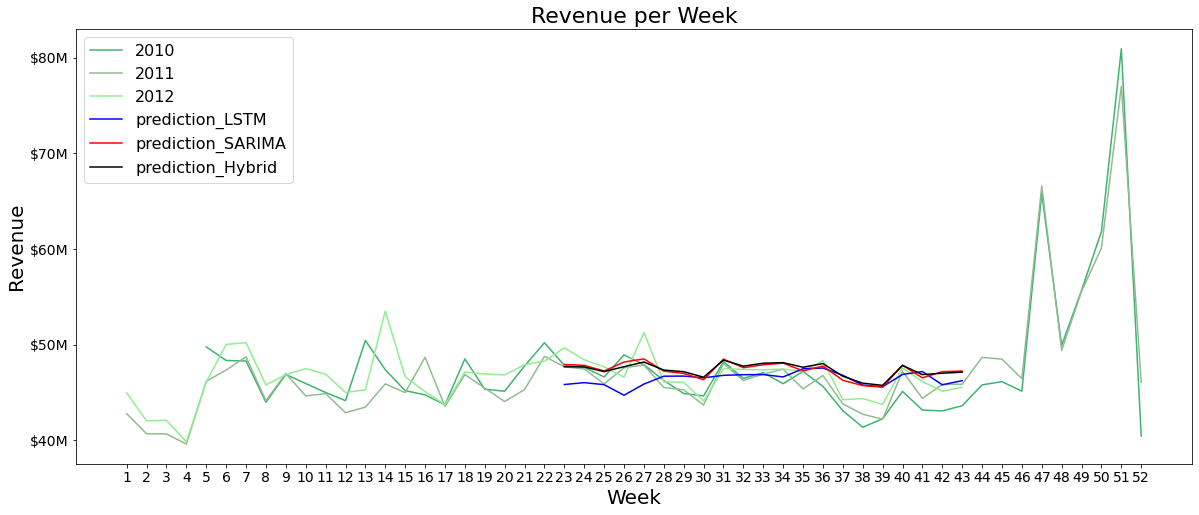

In [52]:
#plot the original sales with our predictions

weekly_sales_2010 = train_set[train_set.Year==2010]['Weekly_Sales'].groupby(train_set['Week']).sum()
weekly_sales_2011 = train_set[train_set.Year==2011]['Weekly_Sales'].groupby(train_set['Week']).sum()
weekly_sales_2012 = train_set[train_set.Year==2012]['Weekly_Sales'].groupby(train_set['Week']).sum()
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values, color='mediumseagreen')
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values, color='darkseagreen')
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values, color='lightgreen')
sns.lineplot(range(23,44), sum_stores.values, color='blue')
sns.lineplot(range(23,44),sum_sarima, color='red')
sns.lineplot(range(23,44),sum_msew.values, color='black')

formatter = FuncFormatter(thousands)

ax.yaxis.set_major_formatter(formatter)
#ax.xaxis.set_ticks(np.arange(1, 53, step=1))
#ax.xaxis(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012','prediction_LSTM','prediction_SARIMA','prediction_Hybrid'], loc='best', fontsize=16)
plt.xticks(np.arange(1, 53, step=1), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Revenue per Week', fontsize=22)
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.show()

In [15]:
#create table for errors

errors = {'Name':['LSTM_all_scaled','LSTM_all_unscaled','LSTM_all_stores','LSTM_all_stores_2','SARIMA','Hybrid_MSEW'],'RMSE':np.zeros(6), 'MAE':np.zeros(6), 'MAPE':np.zeros(6) }
errors_df=pd.DataFrame(errors)
errors_df

,Name,RMSE,MAE,MAPE
0,LSTM_all_scaled,0.0,0.0,0.0
1,LSTM_all_unscaled,0.0,0.0,0.0
2,LSTM_all_stores,0.0,0.0,0.0
3,LSTM_all_stores_2,0.0,0.0,0.0
4,SARIMA,0.0,0.0,0.0
5,Hybrid_MSEW,0.0,0.0,0.0


In [54]:
#create list with all the predictions
sum_real=sales_store.sum(axis=1)
sum_stores=pred_store.sum(axis=1)
sum_scaled=pred_all_scaled.sum(axis=1)
sum_2=pred_store_2.sum(axis=1)
sum_unscaled=pred_all_unscaled.sum(axis=1)
liste_mit_listen=[]
liste_mit_listen.append(sum_scaled)
liste_mit_listen.append(sum_unscaled)
liste_mit_listen.append(sum_stores)
liste_mit_listen.append(sum_2)
liste_mit_listen.append(sum_sarima)
liste_mit_listen.append(sum_msew)
sum_real


Date
2012-06-08    49633505.78
2012-06-15    48394551.88
2012-06-22    47651651.56
2012-06-29    46581389.30
2012-07-06    51235198.51
2012-07-13    46083165.92
2012-07-20    46043195.39
2012-07-27    44081423.79
2012-08-03    47469271.25
2012-08-10    47387331.12
2012-08-17    47337121.35
2012-08-24    47431037.20
2012-08-31    47159639.43
2012-09-07    48330059.31
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
dtype: float64

In [58]:
#calculate the errors and save then in a csv 
rmse_liste=[]
mae_liste=[]
mape_liste=[]

for element in liste_mit_listen:
    
    mae_liste.append(np.mean(abs((element - sum_real))))
    mape_liste.append(mean_absolute_percentage_error(element, sum_real))

#errors_df['RMSE']=rmse_liste
errors_df['MAE']=mae_liste
errors_df['MAPE']=mape_liste


errors_df.to_csv('Errors.csv')

In [59]:
errors_df


,Name,RMSE,MAE,MAPE
0,LSTM_all_scaled,5.263845e+06,4.922232e+06,0.095183
1,LSTM_all_unscaled,2.888344e+07,2.882718e+07,1.609347
2,LSTM_all_stores,1.946033e+06,1.500949e+06,0.032537
3,LSTM_all_stores_2,4.714008e+06,4.249839e+06,0.083012
4,SARIMA,1.367932e+06,NaN,0.024209
5,Hybrid_MSEW,1.475702e+06,NaN,0.026397
